## poisson intervals distribution

219.0
213.0
2.0
68.0
19.0
103.0
220.0
61.0
119.0
28.0
100.0
56.0
70.0
2.0
43.0
65.0
114.0
59.0
437.0
105.0
40.0
136.0
132.0
106.0
18.0
72.0
37.0
160.0
313.0
60.0
122.0
131.0
126.0
39.0
49.0
136.0
56.0
45.0
69.0
169.0
179.0
229.0
80.0
41.0
367.0
139.0
209.0
167.0
20.0
334.0
69.0
17.0
607.0
256.0
5.0
241.0
99.0
122.0
53.0
64.0
82.0
70.0
135.0
20.0
8.0
75.0
204.0
67.0
220.0
114.0
38.0
18.0
92.0
11.0
165.0
1.0
84.0
36.0
3.0
8.0
106.0
72.0
63.0
78.0
112.0
47.0
35.0
4.0
52.0
2.0
486.0
325.0
17.0
166.0
50.0
2.0
64.0
224.0
71.0
267.0
46.0
75.0
19.0
121.0
28.0
80.0
6.0
145.0
45.0
92.0
22.0
234.0
110.0
8.0
186.0
49.0
1.0
90.0
91.0
26.0
5.0
50.0
15.0
123.0
46.0
79.0
34.0
84.0
112.0
67.0
15.0
118.0
178.0
55.0
2.0
222.0
147.0
12.0
12.0
213.0
25.0
99.0
50.0
13.0
22.0
94.0
20.0
40.0
125.0
293.0
8.0
131.0
68.0
54.0
40.0
115.0
34.0
145.0
74.0
100.0
23.0
131.0
45.0
107.0
78.0
21.0
169.0
118.0
68.0
10.0
7.0
57.0
317.0
52.0
244.0
147.0
91.0
123.0
27.0
62.0
4.0
34.0
297.0
336.0
49.0
31.0
10.0
216.0
185.0
1

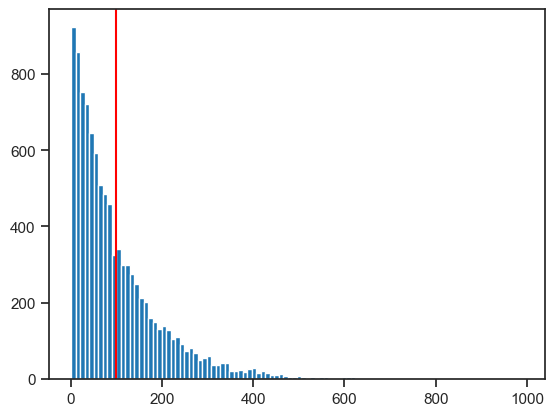

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prob = []
for i in range(100000):
    roll= np.ceil(np.random.exponential(100))
    prob.append(roll)
    print(np.ceil(roll))
plt.hist(prob[:10000],100)


plt.axvline(np.mean(prob), color='red')
print("mean:" + str(np.mean(prob)) +"\nmax:" + str(np.max(prob)))

# sns.distplot(np.random.exponential(size=1000000), hist=true)


# test #1

659000
879000
893000


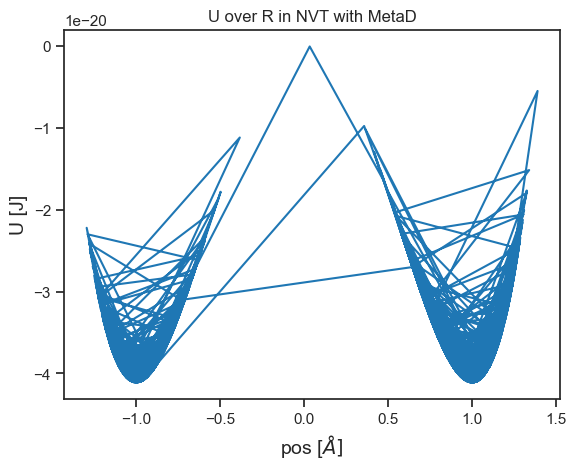

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_low.log", sep='\s+')

xyz = open("SimForMetaD_low.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

659000.0
879000.0
893000.0


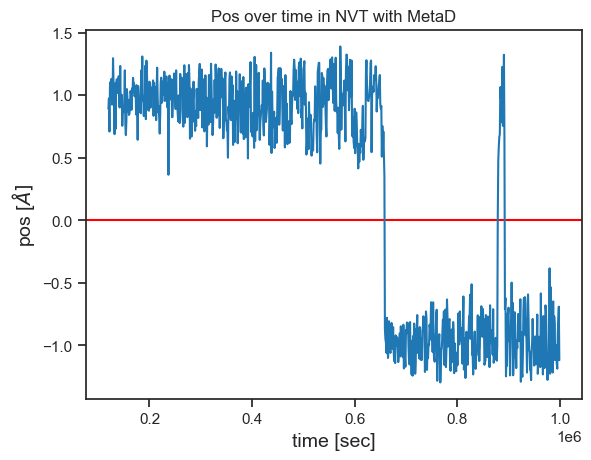

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_low.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD")
plt.xlabel("time [sec]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)